# Setup

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
#import pylab as plt
import rbepwt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (12, 12)

In [46]:
img_codenames = ['peppers256-easypath-bior4.4-16levels',\
                 'peppers256-gradpath-bior4.4-16levels',\
                 'peppers256-epwt-easypath-bior4.4-16levels',\
                 'house256-easypath-bior4.4-16levels',\
                 'house256-gradpath-bior4.4-16levels',
                 'house256-epwt-easypath-bior4.4-16levels',\
                 'cameraman256-easypath-bior4.4-16levels',\
                 'cameraman256-gradpath-bior4.4-16levels',\
                 'cameraman256-epwt-easypath-bior4.4-16levels',\
]
#they havel all 256*256=65536 pixels
thresholds = [4096,2048,1024,512]
#save = False
table = pd.DataFrame(columns=['image','encoding','wavelet','levels','coefficients','psnr','ssim','vsi','haarpsi'])
imgpath = '../img/'
savedir = '../decoded_pickles/'
#table.loc[len(table)] = ['cameraman','easypath','bior4.4',16,4096,0.9,0.8,0.7,0.99999]
#table.loc[len(table)] = ['cameraman','easypath','bior4.4',16,4096,0.9,0.8,0.7,0.99999]
#table

# Compute rbepwt encodings and save them

In [19]:
#compute all the decodings and save the new pickles
for thresh in thresholds:
    for ic in img_codenames:
        imgpath = '../pickled/' + ic
        img = rbepwt.Image()
        img.load_pickle(imgpath)
        img.rbepwt.threshold_coefs(thresh)
        img.decode_rbepwt()
        savename = ic+'--'+str(thresh)
        img.save_pickle(savedir+savename)

        psnr = img.psnr()
        ssim = img.ssim()
        vsi = img.vsi()
        haarpsi = img.haarpsi()
        splitted = ic.split('-')
        imgname,encoding = splitted[:2]
        imgname = imgname.rstrip('256')
        #print(imgname,encoding)
        table.loc[len(table)] = [imgname,encoding,'bior4.4',16,thresh,psnr,ssim,vsi,haarpsi]
        print(table)


--DECODING: finished working on level 16 

--DECODING: finished working on level 15 

--DECODING: finished working on level 14 

--DECODING: finished working on level 13 

--DECODING: finished working on level 12 

--DECODING: finished working on level 11 

--DECODING: finished working on level 10 

--DECODING: finished working on level 9 

--DECODING: finished working on level 8 

--DECODING: finished working on level 7 

--DECODING: finished working on level 6 

--DECODING: finished working on level 5 

--DECODING: finished working on level 4 

--DECODING: finished working on level 3 

--DECODING: finished working on level 2 

--DECODING: finished working on level 1 
     image  encoding  wavelet  levels  coefficients       psnr    ssim  \
0  peppers  easypath  bior4.4    16.0        4096.0  31.961434  0.5981   

        vsi   haarpsi  
0  0.999646  0.999999  

--DECODING: finished working on level 16 

--DECODING: finished working on level 15 

--DECODING: finished working on level

# Compute DWT encodings and save them

In [21]:
#tensor product wavelet transform
fnames = ['peppers256.png','house256.png','cameraman256.png']
for thresh in thresholds: 
    for fname in fnames:
        img = rbepwt.Image()
        img.read(imgpath+fname)
        img.encode_dwt(4,'bior4.4')
        img.dwt.threshold_coefs(thresh)
        img.decode_dwt()
        psnr = img.psnr()
        ssim = img.ssim()
        vsi = img.vsi()
        haarpsi = img.haarpsi()
        imgname = fname.rstrip('.png')
        savename = imgname+'-tensor-bior4.4-4levels--'+str(thresh)
        img.save_pickle(savedir+savename)
        table.loc[len(table)] = [imgname.rstrip('256'),'tensor','bior4.4',4,thresh,psnr,ssim,vsi,haarpsi]

## Recompute table only

In [73]:
table = pd.DataFrame(columns=['image','encoding','wavelet','levels','coefficients','psnr','ssim','vsi','haarpsi'])
for thresh in thresholds:
    for imgname in ['cameraman256','house256','peppers256']:
        for enc in ['easypath','gradpath','epwt-easypath','tensor']:
            img = rbepwt.Image()
            if enc == 'tensor':
                levs = '4'
            else:
                levs = '16'
            loadstr = savedir+imgname+'-'+enc+'-bior4.4'+'-'+levs+'levels--'+str(thresh)
            #print(loadstr)
            img.load_pickle(loadstr)
            psnr = img.psnr()
            ssim = img.ssim()
            vsi = img.vsi()
            haarpsi = img.haarpsi()
            table.loc[len(table)] = [imgname.rstrip('256'),enc,'bior4.4',int(levs),thresh,psnr,ssim,vsi,haarpsi]

In [74]:
table

,image,encoding,wavelet,levels,coefficients,psnr,ssim,vsi,haarpsi
0,cameraman,easypath,bior4.4,16.0,4096.0,31.553285,0.369480,0.999721,0.999999
1,cameraman,gradpath,bior4.4,16.0,4096.0,35.684819,0.383180,0.999737,0.999999
2,cameraman,epwt-easypath,bior4.4,16.0,4096.0,38.683173,0.463460,0.999705,0.999999
3,cameraman,tensor,bior4.4,4.0,4096.0,39.739825,0.438344,0.999753,0.999999
4,house,easypath,bior4.4,16.0,4096.0,62.877705,0.385076,0.999835,1.000000
5,house,gradpath,bior4.4,16.0,4096.0,66.069270,0.395387,0.999857,1.000000
6,house,epwt-easypath,bior4.4,16.0,4096.0,62.645203,0.414680,0.999871,1.000000
7,house,tensor,bior4.4,4.0,4096.0,71.301546,0.436580,0.999922,1.000000
8,peppers,easypath,bior4.4,16.0,4096.0,31.961434,0.598100,0.999646,0.999999
9,peppers,gradpath,bior4.4,16.0,4096.0,34.414415,0.608739,0.999630,0.999999


In [80]:
tsorted = table.sort(columns=['image','coefficients'],ascending=[True,True])
#tsorted = table.sort(columns='haarpsi',ascending=False)
tsorted
#print(tsorted.to_csv())

/Users/renato/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,image,encoding,wavelet,levels,coefficients,psnr,ssim,vsi,haarpsi
36,cameraman,easypath,bior4.4,16.0,512.0,-16.872589,0.170191,0.996946,0.999986
37,cameraman,gradpath,bior4.4,16.0,512.0,-14.799032,0.178422,0.997216,0.999987
38,cameraman,epwt-easypath,bior4.4,16.0,512.0,-10.968044,0.227094,0.997632,0.999990
39,cameraman,tensor,bior4.4,4.0,512.0,-16.413514,0.189836,0.996625,0.999984
24,cameraman,easypath,bior4.4,16.0,1024.0,-5.372786,0.225542,0.998498,0.999993
25,cameraman,gradpath,bior4.4,16.0,1024.0,-2.322929,0.232422,0.998854,0.999994
26,cameraman,epwt-easypath,bior4.4,16.0,1024.0,0.594865,0.293403,0.998797,0.999995
27,cameraman,tensor,bior4.4,4.0,1024.0,-0.285077,0.263941,0.998318,0.999993
12,cameraman,easypath,bior4.4,16.0,2048.0,10.163922,0.284781,0.999258,0.999997
13,cameraman,gradpath,bior4.4,16.0,2048.0,13.810664,0.292527,0.999460,0.999998


In [78]:
tsorted[tsorted['coefficients'] == 1024].sort('psnr',ascending=False)

/Users/renato/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,image,encoding,wavelet,levels,coefficients,psnr,ssim,vsi,haarpsi
29,house,gradpath,bior4.4,16.0,1024.0,25.098366,0.263876,0.999183,0.999997
31,house,tensor,bior4.4,4.0,1024.0,24.110871,0.277730,0.998875,0.999996
30,house,epwt-easypath,bior4.4,16.0,1024.0,23.218654,0.271269,0.998687,0.999997
28,house,easypath,bior4.4,16.0,1024.0,22.708960,0.256857,0.998574,0.999997
34,peppers,epwt-easypath,bior4.4,16.0,1024.0,0.660817,0.467651,0.997839,0.999994
26,cameraman,epwt-easypath,bior4.4,16.0,1024.0,0.594865,0.293403,0.998797,0.999995
27,cameraman,tensor,bior4.4,4.0,1024.0,-0.285077,0.263941,0.998318,0.999993
35,peppers,tensor,bior4.4,4.0,1024.0,-2.063485,0.470478,0.997763,0.999992
25,cameraman,gradpath,bior4.4,16.0,1024.0,-2.322929,0.232422,0.998854,0.999994
24,cameraman,easypath,bior4.4,16.0,1024.0,-5.372786,0.225542,0.998498,0.999993


# Decoded images

/Users/renato/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


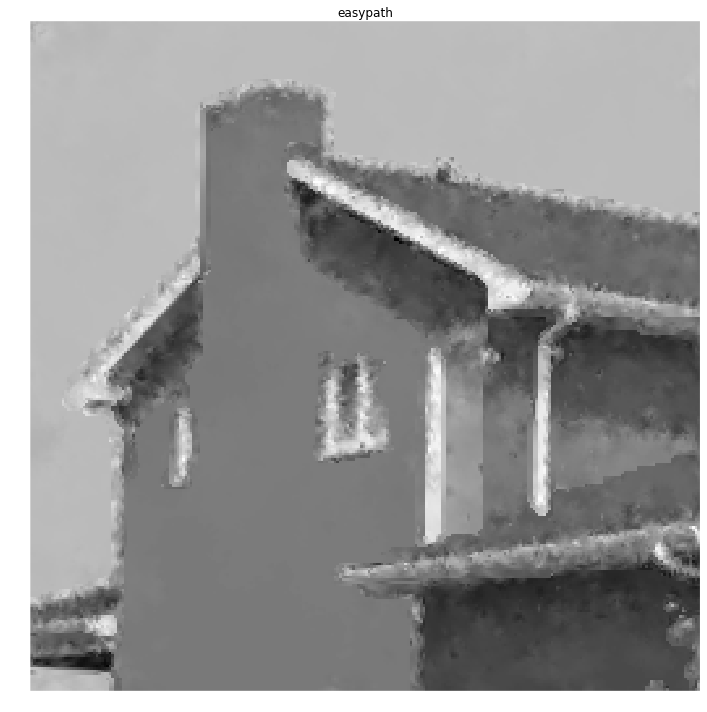

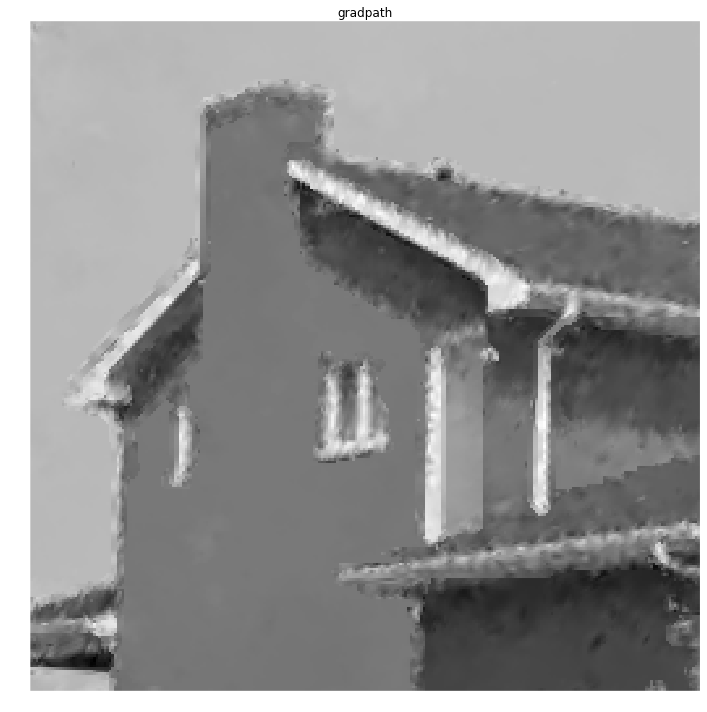

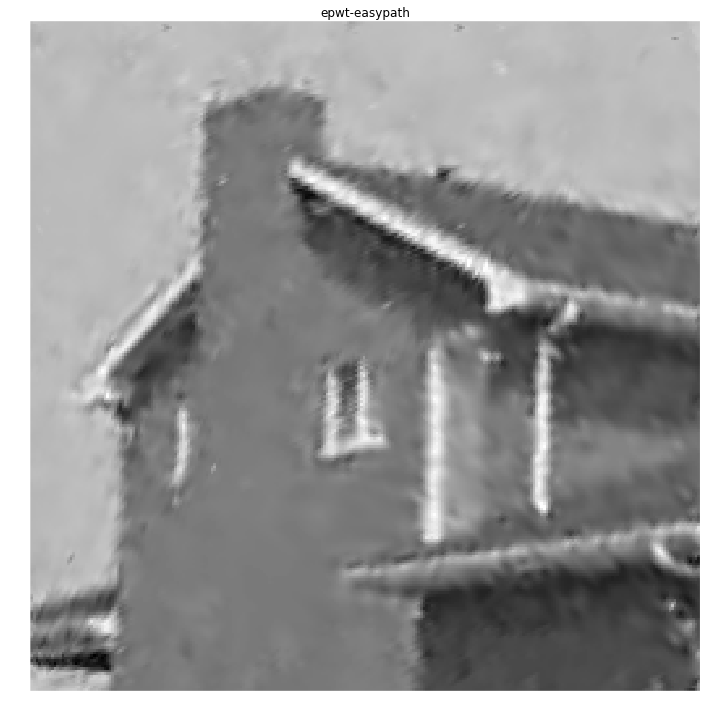

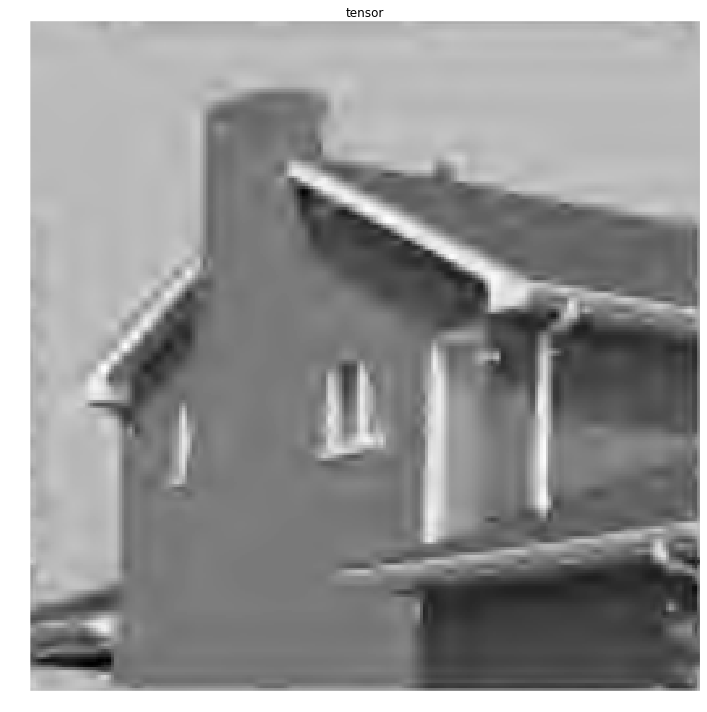

In [139]:
#imgname = 'cameraman256'
#imgname = 'peppers256'
imgname = 'house256'
ncoefs = 1024
for enc in ['easypath','gradpath','epwt-easypath','tensor']:
    img = rbepwt.Image()
    if enc == 'tensor':
        levs = '4'
    else:
        levs = '16'
    loadstr = savedir+imgname+'-'+enc+'-bior4.4'+'-'+levs+'levels--'+str(ncoefs)
    img.load_pickle(loadstr)
    img.show_decoded(title=enc)

## error plots

/Users/renato/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


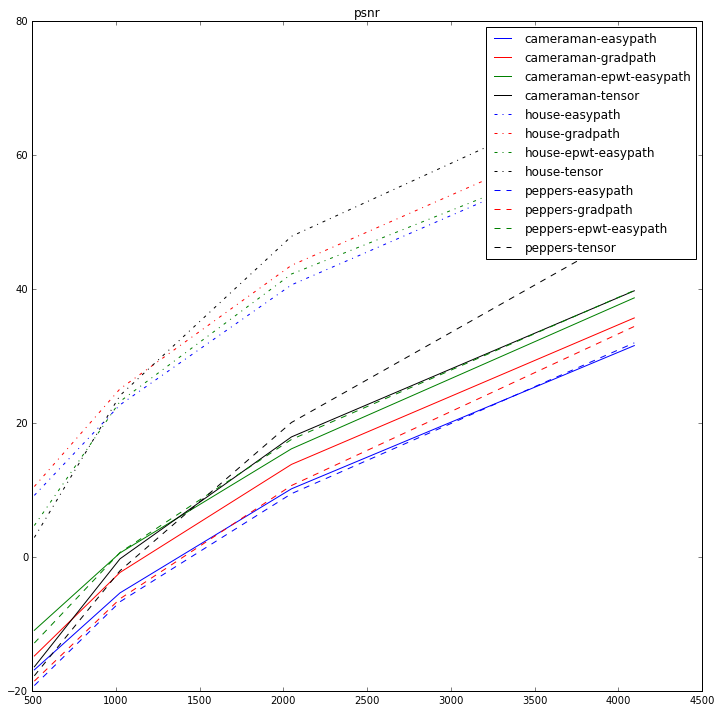

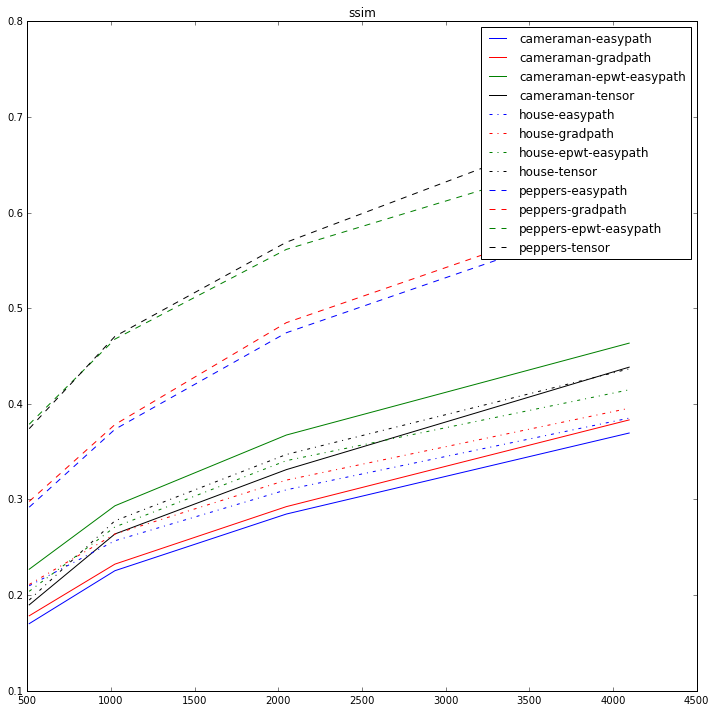

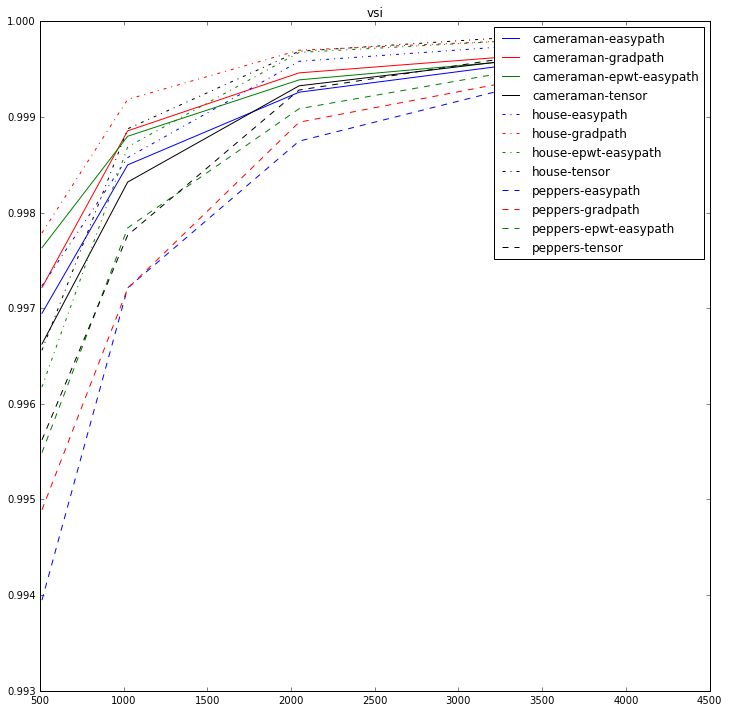

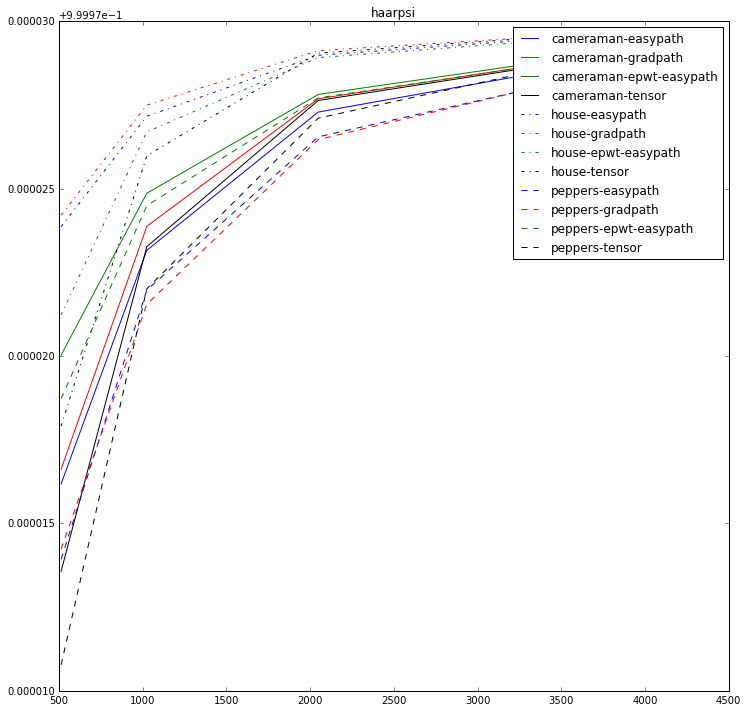

In [138]:
vecs = {}
for index in ['psnr','ssim','vsi','haarpsi']:
    fig = plt.figure()
    plt.title(index)
    for imgname in ['cameraman','house','peppers']:
        for enc in ['easypath','gradpath','epwt-easypath','tensor']:
            vec = np.array(table[(table['image'] == imgname) & (table['encoding'] == enc)].sort('coefficients')[index])
            #print(imgname,enc,vec)
            if enc == 'easypath':
                lsty = 'b'
            elif enc == 'gradpath':
                lsty = 'r'
            elif enc == 'epwt-easypath':
                lsty = 'g'
            elif enc == 'tensor':
                lsty = 'k'
            if imgname == 'cameraman':
                lsty += '-' 
            elif imgname == 'house':
                lsty += '-.'
            elif imgname == 'peppers':
                lsty += '--'
            plt.plot(thresholds[::-1],vec,lsty,label=imgname+'-'+enc)
    plt.legend()
    #plt.yscale('log')
    plt.show()

# Segmentations

/Users/renato/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


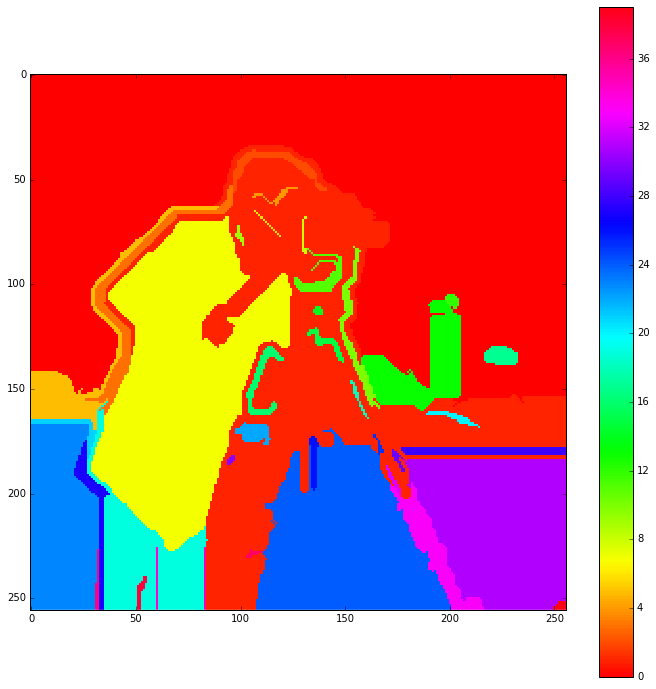

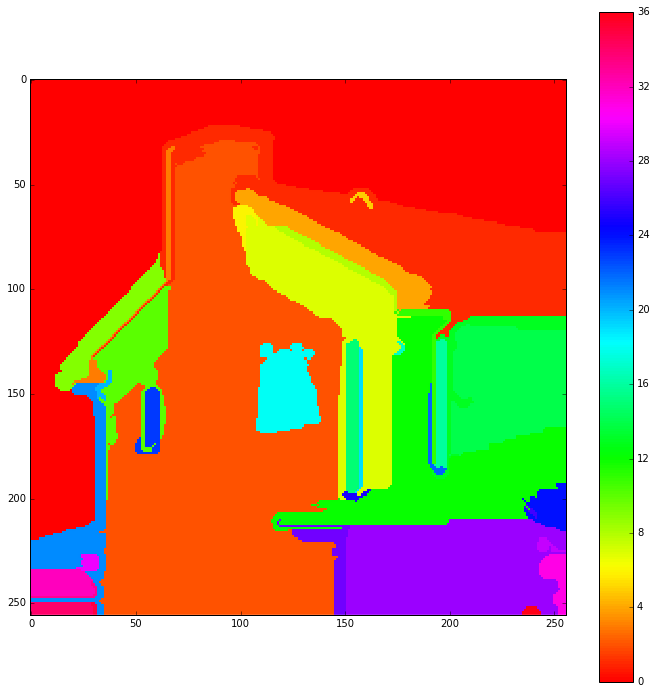

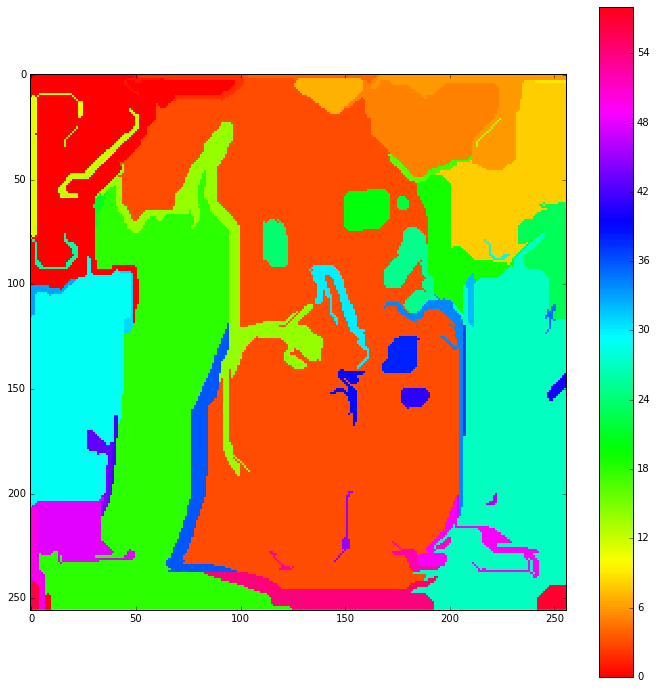

In [66]:
segm_table = pd.DataFrame(columns=['image','nregions','perimeter_length'])
for imgname in ['cameraman256','house256','peppers256']:
    loadstr = savedir+imgname+'-easypath-bior4.4-16levels--4096'
    #print(loadstr)
    img = rbepwt.Image()
    img.load_pickle(loadstr)
    img.show_segmentation()
    per = img.segmentation.estimate_perimeter()
    segm_table.loc[len(segm_table)] = [imgname.rstrip('256'),img.label_img.max() + 1,per]

In [67]:
segm_table

,image,nregions,perimeter_length
0,cameraman,40.0,4538.0
1,house,37.0,4441.0
2,peppers,59.0,6188.0
